In [1]:
import pandas as pd

import os
import re
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')
            
import sys; sys.path.insert(0, '..')
from model.models import run_ensemble_strategy
import data.preprocessing as pp
#from utils_analyze import get_price, check_index_dim
from config.config import indexes, ticker_list, category_dict
%matplotlib inline
%load_ext autoreload
%autoreload 2


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



### Introduction

This notebook is designed for PPO Agent to optimize portfolio allocation from gathering multiple signals.

### Dataset

The dataset consists of 45 stocks from the top **S&P** companies and world wide indices. Below you can see the selected companies and their categories. For each stock a mathematical indicator is calculated.

**Categories**

- Insurance
- Technology
- Software
- Banks and Financials
- Airlines
- Soft Drinks
- Private jet aircraft
- Chocolates
- Shoes
- Jewelry
- Publishing
- Furniture
- Steel
- Energy
- Pharmaceutical
- Home building

**Companies**
- Adobe - 'Software'
- Boeing - 'Technology'
- Wells Fargo -'Banks and Financials'
- PepsiCo - 'Soft Drinks'
- Comcast - 'Telecommunications'
- Cisco Systems - 'Technology'
- Chevron - 'Petroleum'
- Pfizer - 'Pharmaceutical'
- Merck & Co. - 'Pharmaceutical'
- Verizon - 'Telecomunication'
- The Coca-Cola Company - 'Soft Drinks'
- Disney - 'Entertainment'
- The Home Depot - 'Retail'
- ExxonMobil - 'Petroleum'
- UnitedHealth Group - 'Pharmaceutical'
- AT&T - 'Telecommunications
- Intel - 'Technology'
- Bank of America - 'Banks and Financials'
- Procter & Gamble - 'Consumer Good'
- Mastercard - 'Banks and Financials'
- Walmart - 'Retail'
- Johnson & Johnson - 'Pharmaceutical'
- JPMorgan Chase - 'Banks and Financials'
- Visa - 'Banks and Financials'
- Berkshire Hathaway - 'Banks and Financials'
- Facebook - 'Software'
- Alphabet - 'Software'
- Amazon - 'Software
- Apple - 'Technology'
- Microsoft - 'Technology'
- Tesla - 'EV'

In [6]:
sn = pd.read_csv('./datasets/dow30.csv')

<AxesSubplot:>

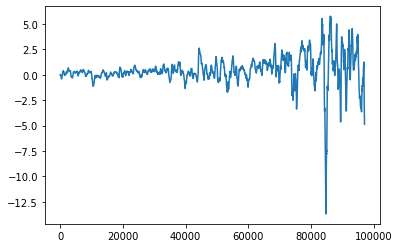

In [3]:
sn[sn.ticker == 'V'].macd.plot()

In [ ]:
#adobe.to_csv('non_processed.csv',ignore_index=True)

In [169]:
#df = df.rename(columns={'volume':'Volume','adjcp':'Adj Close'})

In [12]:
df_non_zero = sn.rename(columns={'Adj Close':'adjcp','Volume':'volume'})
df_non_zero['Date'] = pd.to_datetime(df_non_zero['Date'])
unique_trade_date = df_non_zero[(df_non_zero.Date > pd.to_datetime('2013-06-23'))&(df_non_zero.Date <= pd.to_datetime('2021-02-27'))].Date.unique()
start_test = '2013-01-11'
end_test = '2021-10-28'
# rebalance_window is the number of months to retrain the model
# validation_window is the numebr of months to validation the model and select for trading
rebalance_window = 63
validation_window = 63

In [8]:
hparamlist = [{
    'ent_coef':0.005,
    },{
    'ent_coef':0.01,
    'learning_rate':0.00003,
    'vf_coef':0.005,
    'lambda':0.90,
    'gamma': 0.99,#discountfactor
    'max_grad_norm':0.5,
    'cliprange':0.2,
}]

In [11]:
sn.tail()

,index,Date,Open,High,Low,Close,adjcp,volume,ticker,macd,...,rsi_14,cci_30,dx_30,vr,atr,dma,volume_delta,turbulence,month,day
97015,84083,2021-11-04,209.160004,212.360001,207.869995,208.779999,208.779999,11361500,V,-4.864349,...,33.205699,-164.813926,34.514420,58.169459,5.352577,-7.698799,-125200.0,251.274768,11,4
97016,87317,2021-11-04,52.910000,52.910000,51.200001,51.849998,51.849998,30779900,VZ,-0.219706,...,39.812488,-97.039894,33.135828,107.562506,0.815711,-0.622368,18539900.0,251.274768,11,4
97017,90551,2021-11-04,49.279999,49.560001,48.340000,49.509998,49.509998,6504600,WBA,0.029167,...,57.932996,94.539692,23.774932,93.505365,1.270525,-0.484600,486300.0,251.274768,11,4
97018,93785,2021-11-04,150.179993,151.850006,149.830002,151.279999,151.279999,5049200,WMT,2.256797,...,71.237257,115.758950,42.486518,181.372608,1.877643,4.966997,312700.0,251.274768,11,4
97019,97019,2021-11-04,64.680000,64.889999,63.830002,64.410004,64.410004,17714400,XOM,1.461189,...,59.322383,82.355062,30.423868,129.906825,1.285838,5.166999,341600.0,251.274768,11,4


In [ ]:
run_ensemble_strategy(df=df_non_zero, 
                          unique_trade_date= unique_trade_date,
                          rebalance_window = rebalance_window,
                          validation_window=validation_window,
                          timesteps=50000,
                          hparam_list=hparamlist[0],
                          index_df=df_non_zero,
                          models=['DDPG'],
                          load=False, start_date=start_test, end_date=end_test, model_name='25stocksv2')

======Model training from:  2013-01-11 to  2013-06-24T00:00:00.000000000
======Recurrent PPO Training========
Training time (PPO):  2.747132631142934  minutes
======Recurrent PPO Validation from:  2013-06-24T00:00:00.000000000 to  2013-09-23T00:00:00.000000000
Total reward at validation for Reccurent PPO 10
PPO Sharpe Ratio:  0
======Trading from:  2013-09-23T00:00:00.000000000 to  2013-12-20T00:00:00.000000000 Model is :  Rec_PPO
previous_total_asset:1000000
end_total_asset:1024615.056959172
total_reward:24615.056959172012
total_cost:  2658.8086012284784
total trades:  1026
Sharpe:  0.239630173965288
Total reward for the the window is 2.421885560499504
======Model training from:  2013-01-11 to  2013-09-23T00:00:00.000000000
======Recurrent PPO Training========
Training time (PPO):  2.6315496643384297  minutes
======Recurrent PPO Validation from:  2013-09-23T00:00:00.000000000 to  2013-12-20T00:00:00.000000000
Total reward at validation for Reccurent PPO 10
PPO Sharpe Ratio:  0
======T

Training time (PPO):  2.557100244363149  minutes
======Recurrent PPO Validation from:  2016-03-24T00:00:00.000000000 to  2016-06-23T00:00:00.000000000
Total reward at validation for Reccurent PPO 10
PPO Sharpe Ratio:  0
======Trading from:  2016-06-23T00:00:00.000000000 to  2016-09-22T00:00:00.000000000 Model is :  Rec_PPO
previous_total_asset:1302859.9684177549
end_total_asset:1333082.0582077126
total_reward:30222.08978995774
total_cost:  5973.792858212712
total trades:  1617
Sharpe:  0.11009302803419943
Total reward for the the window is 2.2472132859984413
======Model training from:  2013-01-11 to  2016-06-23T00:00:00.000000000
======Recurrent PPO Training========
Training time (PPO):  2.485209119319916  minutes
======Recurrent PPO Validation from:  2016-06-23T00:00:00.000000000 to  2016-09-22T00:00:00.000000000
Total reward at validation for Reccurent PPO 10
PPO Sharpe Ratio:  0
======Trading from:  2016-09-22T00:00:00.000000000 to  2016-12-21T00:00:00.000000000 Model is :  Rec_PPO


In [5]:
import tensorflow as tf
print(tf.test.is_gpu_available())
print(tf.__version__)


False
1.15.4


# 